# CNN-Finetuning con el dataset Fashion mnist

In [26]:
# librerias
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import keras
from keras.layers import Dropout
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import mobilenet
from tensorflow.image import resize
from tensorflow.image import grayscale_to_rgb
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
SEED = 1000
np.random.seed(SEED)
tf.random.set_seed(SEED)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Carga y preprocesamiento de los datos

In [3]:
# keras ya nos da una función con la que cargar esta base de datos
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_valid, y_train_valid), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, y_train_valid, test_size=0.1, random_state=SEED, stratify=y_train_valid)

print("Dimensiones del conjunto de características de train: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train: {}".format(y_train.shape))
print()
print("Dimensiones del conjunto de características de valid: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de valid: {}".format(y_valid.shape))
print()
print("Dimensiones del conjunto de características de test: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test: {}".format(y_test.shape))

Dimensiones del conjunto de características de train: (54000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (54000,)

Dimensiones del conjunto de características de valid: (6000, 28, 28)
Dimensiones del conjunto de etiquetas de valid: (6000,)

Dimensiones del conjunto de características de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


In [4]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]], cmap=color)
    plt.show()

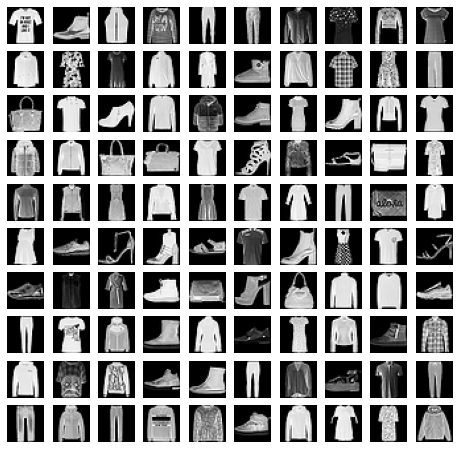

In [5]:
show_images(x_train)

In [6]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = to_categorical(y_train, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))
print()

x_valid = x_valid.astype('float32')
x_valid /= 255
x_valid = x_valid.reshape(x_valid.shape[0],-1)
y_valid = to_categorical(y_valid, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_valid.shape))
print()


x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = to_categorical(y_test, num_classes=10)
print("Dimensiones del conjunto de características de test aplanadas: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

Dimensiones del conjunto de características de train aplanadas: (54000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (54000, 10)

Dimensiones del conjunto de características de train aplanadas: (6000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (6000, 10)

Dimensiones del conjunto de características de test aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (10000, 10)


# Grafo

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu')) # Primera capa oculta
model.add(Dense(32, activation='relu')) # Segunda capa oculta
model.add(Dense(10, activation='softmax')) # Salida (10 clases)

## Entrenamiento

In [8]:
# Ejemplo con las funciones predefinidas y con valores por defecto
model.compile(loss='categorical_crossentropy', optimizer='sgd')
# Podemos añadir métricas (estas metricas no se van a usar para el entrenamiento)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [9]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=128)

Epoch 1/20
422/422 [==============================] - 5s 5ms/step - loss: 1.4895 - acc: 0.5117 - val_loss: 0.8911 - val_acc: 0.7010
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.7746 - acc: 0.7392 - val_loss: 0.6865 - val_acc: 0.7620
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.6440 - acc: 0.7825 - val_loss: 0.6077 - val_acc: 0.7857
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5804 - acc: 0.8035 - val_loss: 0.5588 - val_acc: 0.8043
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5423 - acc: 0.8141 - val_loss: 0.5296 - val_acc: 0.8137
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5154 - acc: 0.8231 - val_loss: 0.5108 - val_acc: 0.8223
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4962 - acc: 0.8290 - val_loss: 0.4934 - val_acc: 0.8265
Epoch 8/20
422/422 [==============================] - 2s 5ms/step - loss: 0.

## Evaluacion

In [11]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


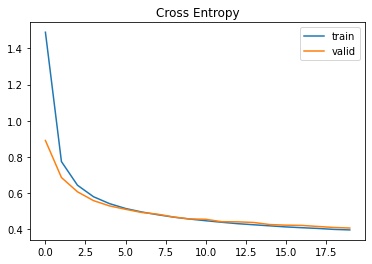

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

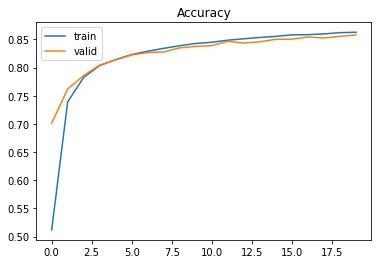

In [13]:
# Mostramos la evolución del accuracy a través de los epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

## Predicción y test

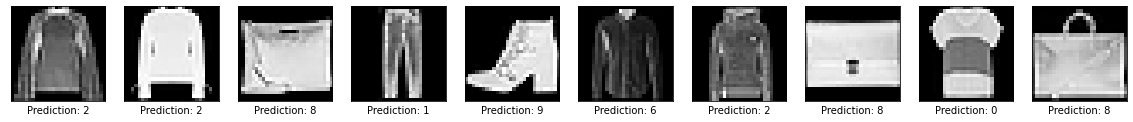

In [14]:
# En este caso nos quedamos con las clases
# predictions = model.predict_classes(x_test) # no usamos por que esta deprecado
predictions = np.argmax(model.predict(x_test), axis=-1)

# Mostramos algunos digitos con las clases predichas
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(x_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(x_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

In [15]:
score = model.evaluate(x_test, y_test)
print()
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4307 - acc: 0.8491

Loss: 0.4307287037372589
Accuracy: 0.8490999937057495


# Finetuning con Mobilenet

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Encajamos a lo requerido [entradas, ancho, altura] -> [entradas, ancho, altura, dimensiones=1]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

## Iterador de imagenes

In [ ]:
# ImageDtaGenerator
train_datagen = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input)

# Escalamos el tamaño el tamaño
X_train = resize(X_train, [64,64])
X_test = resize(X_test, [64,64])

# Correcion de color
X_train = grayscale_to_rgb(X_train)
X_test = grayscale_to_rgb(X_test)

# Conversion numerica
X_train = X_train.numpy()
X_test = X_test.numpy()

# One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Iteradores
train_iter = train_datagen.flow(X_train,y_train,
                                batch_size=32,
                                shuffle=True)

test_iter = test_datagen.flow(X_test,y_test,
                                batch_size=32,
                                shuffle=False)

In [ ]:
modelo_mobile = mobilenet.MobileNet(input_shape=(64,64,3),include_top=False,
                         pooling='avg',weights='imagenet', alpha=1.0)

# y congelamos el entrenamiento en todas las capas
for layer in modelo_mobile.layers:
    layer.trainable = False
    
modelo_mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 32, 32, 32) 

## Modificacion de capas

In [ ]:
# numero de variabels target
num_classes = y_train.shape[1]

# Adaptamos la red neuronal que teníamos antes
x = Dense(192,activation='relu')(modelo_mobile.output)
x = Dropout(0.2)(x)
x = Dense(192,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(192,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(y_train.shape[1], activation='softmax', name='mnist_fashion_out')(x)
    
model = Model(inputs = modelo_mobile.input, outputs = x)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 32, 32, 32)        0   

## Entrenamiento y resultados

In [ ]:
# entrenamineto del modelo modificado con 4 capas ocultas
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_iter,
                    steps_per_epoch=X_train.shape[0]//train_iter.batch_size,
                    epochs=10,
                    validation_data=test_iter,
                    validation_steps=X_test.shape[0]//test_iter.batch_size)

Epoch 1/10
1875/1875 [==============================] - 62s 18ms/step - loss: 0.5221 - accuracy: 0.8163 - val_loss: 0.3913 - val_accuracy: 0.8529
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3784 - accuracy: 0.8653 - val_loss: 0.3714 - val_accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3403 - accuracy: 0.8774 - val_loss: 0.3456 - val_accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3122 - accuracy: 0.8877 - val_loss: 0.3610 - val_accuracy: 0.8734
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2912 - accuracy: 0.8944 - val_loss: 0.3472 - val_accuracy: 0.8788
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2699 - accuracy: 0.9004 - val_loss: 0.3516 - val_accuracy: 0.8814
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2537 - accuracy: 0.9081 - val_loss: 0.3623 -

In [ ]:
score = model.evaluate(test_iter,steps=X_test.shape[0]//test_iter.batch_size)
print("Loss en test: %f \nAccuracy en test: %f"%(score[0],score[1]))

312/312 [==============================] - 5s 15ms/step - loss: 0.3790 - accuracy: 0.8792
Loss en test: 0.379014 
Accuracy en test: 0.879207


# Finetunning con vgg16

In [32]:
X_train = []
y_train = []
X_test = []
y_test = []

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Encajamos a lo requerido [entradas, ancho, altura] -> [entradas, ancho, altura, dimensiones=1]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

## Aplicamos el iterador de imagenes

In [33]:
# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)

# Escalamiento para el uso de vgg16
X_train = resize(X_train, [64,64])
X_test = resize(X_test, [64,64])

# Correccion de color
X_train = grayscale_to_rgb(X_train)
X_test = grayscale_to_rgb(X_test)

# Conversion numerica
X_train = X_train.numpy()
X_test = X_test.numpy()

# One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Creacion de iteradores
train_iter = train_datagen.flow(X_train,y_train,
                                batch_size=32,
                                shuffle=True)

test_iter = test_datagen.flow(X_test,y_test,
                                batch_size=32,
                                shuffle=False)

## Modelamiento


In [34]:
# Modelo vgg16
model_vgg16 = vgg16.VGG16(input_shape=(64,64,3),include_top=False,
                         pooling='avg',weights='imagenet')

# y congelamos el entrenamiento en todas las capas
for layer in model_vgg16.layers:
    layer.trainable = False
    
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

## Modificacion de capas

In [35]:
# Numero de vairbales target
num_classes = y_train.shape[1]

# Adaptamos la red neuronal que teníamos antes
x = Dense(192,activation='relu')(model_vgg16.output)
x = Dropout(0.2)(x)
x = Dense(192,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(y_train.shape[1], activation='softmax', name='mnist_fashion_out')(x)
    
model = Model(inputs = model_vgg16.input, outputs = x)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

## Entrenamiento y resultados

In [36]:
# Entrenamiento del nuevo modelo con capas modificadas
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_iter,
                    steps_per_epoch=X_train.shape[0]//train_iter.batch_size,
                    epochs=10,
                    validation_data=test_iter,
                    validation_steps=X_test.shape[0]//test_iter.batch_size)

Epoch 1/10
1875/1875 [==============================] - 78s 40ms/step - loss: 0.6593 - accuracy: 0.7946 - val_loss: 0.4087 - val_accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.4153 - accuracy: 0.8527 - val_loss: 0.3838 - val_accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3708 - accuracy: 0.8686 - val_loss: 0.3790 - val_accuracy: 0.8620
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3488 - accuracy: 0.8735 - val_loss: 0.3640 - val_accuracy: 0.8716
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3326 - accuracy: 0.8815 - val_loss: 0.3521 - val_accuracy: 0.8764
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3186 - accuracy: 0.8848 - val_loss: 0.3712 - val_accuracy: 0.8733
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3059 - accuracy: 0.8900 - val_loss: 0.3562 -

In [37]:
# Evaluacion y score final
score = model.evaluate(test_iter,steps=X_test.shape[0]//test_iter.batch_size)
print("Loss en test: %f \nAccuracy en test: %f"%(score[0],score[1]))

312/312 [==============================] - 11s 34ms/step - loss: 0.3698 - accuracy: 0.8808
Loss en test: 0.369790 
Accuracy en test: 0.880809


# **RESULTADOS FINALES**

- Realizando una comparacion con las modificaciones hechas, se puede observar que el mejor modelo es el que se modifico con vgg16 ( con un accuracy de \~88%), en comparacion con MobileNet (\~87%) y el grafo como modelo base (\~84%).

- El incremento de capas profundas tambien tuvo un papel importante en la mejora de la metrica, mejorando el acurracy pero demorando mas en el tiempo de ejecución.
